# Práctica inicial 
## TP integrador - Primera parte
### EDA inicial - Obras iniciadas (Dataset Provincia Bs. As)
#### Grupo_08 - Septiembre 2020

En este primer código se hará un análisis preliminar para ver las posibilidades de utilizar el Dataset obtenido del siguiente link: https://data.buenosaires.gob.ar/dataset/obras-iniciadas  como potencial base para el Trabajo Práctico de la materia Ciencia de Datos

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_csv('C:/Users/Mica/Google Drive/Quinto año/Cs de datos/Práctica/obras-iniciadas.csv')
#historico = pd.read_csv('C:/Users/Mica/Google Drive/Quinto año/Cs de datos/Práctica/registro-acumulado-historico-de-obras-iniciadas.csv')

In [3]:
print(f'Shape: {np.shape(obras)}')
obras.head(3)

Shape: (7519, 23)


,periodo,long,lat,expediente,calle,calle_nro,seccion,manzana,parcela,fecha_inicio_obra,...,estado_tramite,profesional,metros_a_construir,fecha_estado_tramite,tipo_obra,destino,barrio,comuna,codigo_postal,codigo_postal_argentino
0,202002,-58.411570,-34.606538,NaN,SARMIENTO,3208,13,057,001A,2019-10-12,...,Inicio de obra,LALA NISIM RICARDO,973.44,2019-12-18,AMPLIACION Y MODIFICACION C/DEMOLICION PARCIAL,OTROS,Comuna 3,1196.0,Balvanera,C1196AAJ
1,202002,NaN,NaN,25871534/2016,SENDERO PEATONAL SIN NOMBRE OFICIAL,4363,66,101,001,2017-03-31,...,Obra finalizada,HATSERIAN FEDERICO,2400.00,2018-03-12,OBRA NUEVA,VIVIENDA MULTIFAMILIAR,NaN,NaN,NaN,NaN
2,202002,-58.447407,-34.569383,13764166/2016,AGUILAR,2434,37,151,003a,2017-01-20,...,Obra finalizada,PASQUARELLI PAOLA EMILIA,1479.60,2018-12-07,OBRA NUEVA,VIVIENDA MULTIFAMILIAR,Comuna 13,1426.0,Colegiales,C1426DSJ


In [ ]:
#print(f'Shape: {np.shape(historico)}')
# historico.head(3)

## Features de interés

- Tipo de obra
- Destino
- Metros a construir
- Ubicación geográfica


### Limpieza de datos

#### Tipo de obra

In [4]:
tipos_obras = len(obras['tipo_obra'].unique()) # Cantidad de valores unicos 

print(f'En total hay {tipos_obras} tipos de obras."\r\n')
print("\n", obras['tipo_obra'].unique())

En total hay 15 tipos de obras."


 ['AMPLIACION Y MODIFICACION C/DEMOLICION PARCIAL' 'OBRA NUEVA'
 'DEMOLICIÓN TOTAL Y OBRA NUEVA' 'MODIFICACION Y/O AMPLIACION'
 'DEMOLICIÓN TOTAL' 'DEMOLICION TOTAL Y OBRA NUEVA' 'DEMOLICION TOTAL' nan
 'AMPLIACIÓN Y MODIFICACIÓN CON DEMOLICIÓN PARCIAL'
 'DEMOLICION PARCIAL Y OBRA NUEVA' 'DEMOLICION PARCIAL' ' '
 'DEMOLICION PARCIAL Y AMPLIACION DE OBRA' 'Obra media' 'Obra menor']


In [5]:
# Vamos a analizar las obras cuyo tipo es ' '

tipo1=obras.loc[obras['tipo_obra']==' ']
tipo1

,periodo,long,lat,expediente,calle,calle_nro,seccion,manzana,parcela,fecha_inicio_obra,...,estado_tramite,profesional,metros_a_construir,fecha_estado_tramite,tipo_obra,destino,barrio,comuna,codigo_postal,codigo_postal_argentino
1347,202002,-58.495918,-34.568769,27923299/2017,ANDONAEGUI,3275,63,096B,013,NaN,...,Obra finalizada,AMICHETTI OMAR EDUARDO,NaN,2017-10-07,,VIVIENDA MULTIFAMILIAR,Comuna 12,1431.0,Villa Urquiza,C1431DWQ
3641,202002,-58.411769,-34.587816,26666421/2016,SANTA FE AV.,3311,21,001A,014,NaN,...,Obra finalizada,PRINCIPE LUIS EDGARDO ARIEL,NaN,2017-10-25,,VIVIENDA MULTIFAMILIAR,Comuna 14,1425.0,Palermo,C1425BGI


In [6]:
# Baaai, no nos interesa, se fue a Disney

obras= obras[obras['tipo_obra'] != ' ']

# Vamos a ver cómo queda el dataframe, no vaya a ser que borré muchas cosas
filas = np.shape(obras)[0] 
print(f'Filas: {filas}')

# Antes de esta limipieza había 7519, estamos bien

Filas: 7517


In [7]:
# Vamos a borrar las obras cuyo tipo es 'NaN'

obras.dropna(subset=['tipo_obra'], how='any', inplace=True, axis='index')

filas = np.shape(obras)[0] 
print(f'Filas: {filas}')

# Hermoso

Filas: 7414


In [9]:
# Siguiendo con el tipo de obras, hay varias categorías que están repetidas:
# EJ: 'AMPLIACION Y MODIFICACION C/DEMOLICION PARCIAL' y 'AMPLIACIÓN Y MODIFICACIÓN CON DEMOLICIÓN PARCIAL'
# Es lo mismo, vamos a unir todas estas cosas raras para que quede más lindo.

def clean_row(row):
    a= ['AMPLIACION Y MODIFICACION C/DEMOLICION PARCIAL','AMPLIACIÓN Y MODIFICACIÓN CON DEMOLICIÓN PARCIAL']
    b= ['DEMOLICIÓN TOTAL Y OBRA NUEVA','DEMOLICION TOTAL Y OBRA NUEVA']
    c= ['DEMOLICIÓN TOTAL','DEMOLICION TOTAL']
    d= ['Obra media']
    e= ['Obra menor']
    
    if row.tipo_obra in a:
        return 'AMPLIACIÓN Y MODIFICACIÓN CON DEMOLICIÓN PARCIAL'
    if row.tipo_obra in b:
        return 'DEMOLICIÓN TOTAL Y OBRA NUEVA'
    if row.tipo_obra in c:
        return 'DEMOLICIÓN TOTAL'
    if row.tipo_obra in d:
        return 'OBRA MEDIA'
    if row.tipo_obra in e:
        return 'OBRA MENOR'
    return row.tipo_obra

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['tipo_obras']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.tipo_obras.unique())

# Como vemos, ahora no hay valores repetidos :D

['AMPLIACIÓN Y MODIFICACIÓN CON DEMOLICIÓN PARCIAL' 'OBRA NUEVA'
 'DEMOLICIÓN TOTAL Y OBRA NUEVA' 'MODIFICACION Y/O AMPLIACION'
 'DEMOLICIÓN TOTAL' 'DEMOLICION PARCIAL Y OBRA NUEVA' 'DEMOLICION PARCIAL'
 'DEMOLICION PARCIAL Y AMPLIACION DE OBRA' 'OBRA MEDIA' 'OBRA MENOR']


In [10]:
# No se perdió nada en el camino por suerte

np.shape(obras_cleaned)

(7414, 24)

#### Destino

In [11]:
destino_obras = len(obras['destino'].unique()) # Cantidad de valores unicos 

print(f'En total hay {destino_obras} tipos de obras."\r\n')
print("\n", obras['destino'].unique())

# LOCO NO PUEDEN ESCRIBIR SIEMPRE IGUAL? LOS ODIO

En total hay 97 tipos de obras."


 ['OTROS' 'VIVIENDA MULTIFAMILIAR' nan
 'VIVIENDA MULTIFAMILIAR Y ESPACIO GUARDACOCHES' 'VIVIENDA INDIVIDUAL'
 'COMERCIO' 'MULTIVIVIENDA' 'local comercial' 'vivienda'
 'vivienda multifamiliar y estudio profesional' 'Vivienda Unifamiliar.-'
 'VIVIENDA' 'vivienda multifamiliar' 'Vivienda Unifamiliar'
 'VIVIENDA MULTIFAMILIAR CON COCHERAS'
 'VIVIENDA MULTIFAMILIAR Y ESTUDIO PROFESIONAL' 'VIVIENDA UNIFAMILIAR'
 'LOCAL COMERCIAL Y VIVIENDA MULTIFAMILIAR'
 'VIVIENDA MULTIFAMILIAR y LOCAL COMERCIAL' 'VIVIENDAMULTIFAMILIAR'
 'vivienda colectiva'
 'LOCAL COMERCIAL - COMERCIO MINORISTA DE VENTA DE ARTICULOS (EXCLUIDO COMESTIBLES)'
 'Vivenda multifamiliar y cocheras ' 'GIMNASIO' 'VIVIENDA COLECTIVA'
 'Oficinas' 'vivienda unifamliar'
 'VIVIENDA MULTIFAMILIAR Y LOCAL COMERCIAL' 'PLAYA DE ESTACIONAMIENTO '
 'VIV MULTIFAMILIAR, LOCALES COMERCIALES, ESTUDIOS PROFESIONALES, ESTACIONAMIENTO'
 'vivienda unifamiliar' 'Vivienda unifamiliar' 'modificacion y Amplacion'
 'GA

In [12]:
# Vamos a ajustar igual que antes

def clean_row(row):
    a= ['VIVIENDA MULTIFAMILIAR','MULTIVIVIENDA','vivienda multifamiliar',
        'VIVIENDAMULTIFAMILIAR','vivienda colectiva','VIVIENDA COLECTIVA',
        'Vivienda multifamiliar','Vivienda Multifamiliar','CASA DE DEPARTAMENTO',
        'VIVIENDA MULTIFAMILIAR ','Hotel Familiar','Vivienda colectiva',
        'Vivienda Colectiva','VIVIENDA MULTI','vivienda mulfifamiliar']    
    
    b= ['VIVIENDA MULTIFAMILIAR Y ESPACIO GUARDACOCHES','vivienda multifamiliar y estudio profesional',
       'VIVIENDA MULTIFAMILIAR CON COCHERAS','VIVIENDA MULTIFAMILIAR Y ESTUDIO PROFESIONAL',
       'LOCAL COMERCIAL Y VIVIENDA MULTIFAMILIAR','VIVIENDA MULTIFAMILIAR y LOCAL COMERCIAL',
       'Vivenda multifamiliar y cocheras ','VIVIENDA MULTIFAMILIAR Y LOCAL COMERCIAL',
       'VIV MULTIFAMILIAR, LOCALES COMERCIALES, ESTUDIOS PROFESIONALES, ESTACIONAMIENTO',
       'VIVIENDA MULTIFAMILIAR Y COCHERAS','vivienda multifamiliar con estacionamiento y templo',
       'VIVIENDA COLECTIVA Y LOCAL COMERCIAL','VIVIENDA MULTIFAMILIAR - LOCAL COMERCIAL - ESTUDIOS PROFESIONALES',
       'vivienda multifamiliar y cocheras','VIVIENDA MULTIFAMILIAR - ESTUDIO PROFESIONAL Y ESPACIO GUARDA COCHE',
       'VIVIENDA MULTIFAMILIAR, ESTUDIOS PROFESIONALES Y LOCAL COMERCIAL','VIVIENDA COLECTIVAESTUDIOS PROFESIONALES',
       'VIVIENDA MULTIFAMILIAR Y LOCALES COMERCIALES','vivienda multifamiliar y local comercial',
       'LOCALES COMERCIALES Y VIVIENDA MULTIFAMILIAR','Vivienda unifamiliar y locales comerciales',
       'vivienda multifamiliar - estudios profesionales - espacios guardacoches','VIVIENDA MULTIFAMILIAR, LOCAL COMERCIAL, COCHERAS',
       'VIVIENDA COLECTIVA Y LOCALES COMERCIALES','VIVIENDA MULTIFAMILIAR COCHERA','Vivienda multifamiliar y cocheras privadas',
       'VIVIENDA MULTIFAMILIAR - LOCAL COMERCIAL - ESTUDIOS PROFESIONALES ','Vivienda multifamiliar y cocheras privadas']
    
    c= ['VIVIENDA INDIVIDUAL','Vivienda Unifamiliar.-','VIVIENDA','Vivienda Unifamiliar',
      'VIVIENDA UNIFAMILIAR','vivienda unifamliar','vivienda unifamiliar','Vivienda unifamiliar',
      'Vivienda','vvienda unifamiliar','UNIVIVIENDA','viviendas','Vivienda Unica','vivienda']
    
    d= ['VIVIENDA INDIVIDUAL Y LOCALES COMERCIALES','LOCAL COMERCIAL CON VIVIENDA']
    
    e= ['COMERCIO','local comercial','LOCAL COMERCIAL - COMERCIO MINORISTA DE VENTA DE ARTICULOS (EXCLUIDO COMESTIBLES)',
       'Local Minorista','LOCAL COMERCIAL','COMERCIAL','Comercio Minorista','Local Comercial',
       'Comercio Minorista - Optica y fotografia (1.8.14)  y Oficinas','Locales Comerciales','LOCALES COMERCIALES']
    
    f= ['Oficinas','oficina y espacio guardcoche','OFICINAS COMERCIALES','oficina publica',
       'BANCO Y OFICINAS', 'OFICINAS DE LA CONFERENCIA EPISCOPAL ARGENTINA','Oficinas','oficina y espacio guardcoche',
       'oficina publica']
    
    g= ['test']
    
    h= ['PLAYA DE ESTACIONAMIENTO ','GARAJE COMERCIAL']
    
    i= ['DEMOLICION','Demolición','demolicion total','DEMOLICION TOTAL' ]
    
    j= ['Estudio','ESTUDIOS PROFESIONALES']
    
    k= ['modificacion y Amplacion']
    
    l= ['educativo','ESCUELA INFANTIL ESCUELA PRIMARIA']
    
    m= ['ESTACION DE SERVICIO DE COMBUSTIBLES LIQUIDOS, ESTACION DE SERVICIO DE GNC Y COMERCIO MINORISTA OR SISTEMA DE AUTOSERVICIO']
    
    n= ['Hotel']
    
    o= ['Sitio de Telecomunicaciones' ]
    
    p= ['generacion de energia electricas']
    
    q= ['Deposito']
    
    r= ['Obra Nueva']
    
    
    if row.destino in a:
        return 'VIV.MULTIFAMILIAR'
    if row.destino in b:
        return 'VIV.MULTIFAM.COCHERA/LOCAL/ESTUDIOPROF'
    if row.destino in c:
        return 'VIV.ÚNICA'
    if row.destino in d:
        return 'VIV.ÚNICA CON LOCAL'
    if row.destino in e:
        return 'LOCALES COMERCIALES'
    if row.destino in f:
        return 'OFICINA/BANCO/OF.COMERCIAL/OF.PÚBLICA'
    if row.destino in g:
        return 'OTROS'
    if row.destino in h:
        return 'ESTACIONAMIENTO'
    if row.destino in i:
        return 'DEMOLICION'
    if row.destino in j:
        return 'ESTUDIOS'
    if row.destino in k:
        return 'MODIFICACIÓN Y AMPLIACIÓN'
    if row.destino in l:
        return 'ESTABLECIMIENTO EDUCATIVO'
    if row.destino in m:
        return 'ESTACIÓN DE SERVICIOS'
    if row.destino in n:
        return 'HOTEL'
    if row.destino in o:
        return 'TELECOMUNICACIONES'
    if row.destino in p:
        return 'GENERACIÓN ENERGÍA'
    if row.destino in q:
        return 'DEPÓSITO'
    if row.destino in r:
        return 'OBRA NUEVA'

    return row.destino

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['destino']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.destino.unique())

# Como vemos, ahora no hay valores repetidos :D

['OTROS' 'VIV.MULTIFAMILIAR' nan 'VIV.MULTIFAM.COCHERA/LOCAL/ESTUDIOPROF'
 'VIV.ÚNICA' 'LOCALES COMERCIALES' 'GIMNASIO'
 'OFICINA/BANCO/OF.COMERCIAL/OF.PÚBLICA' 'ESTACIONAMIENTO'
 'MODIFICACIÓN Y AMPLIACIÓN' 'DEMOLICION' 'ESTACIÓN DE SERVICIOS'
 'VIV.ÚNICA CON LOCAL' 'HOTEL' 'ESTUDIOS' 'TELECOMUNICACIONES'
 'GENERACIÓN ENERGÍA' 'OBRA NUEVA' 'ESTABLECIMIENTO EDUCATIVO'
 'CULTURA Y ESPECTACULOS' 'DEPÓSITO' 'SALUD']


In [13]:
np.shape(obras_cleaned)

(7414, 23)

In [14]:
# Vamos a borrar las obras cuyo tipo es 'NaN'

obras_cleaned.dropna(subset=['destino'], how='any', inplace=True, axis='index')

filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

# Hermoso

Filas: 7072


#### Metros a construir

In [15]:
# Esta no puede estar mal, no? acordarse que ahora estamos usando el dataframe obras_cleaned

obras_cleaned['metros_a_construir'].describe()

# Veo que cuenta menos filas que las que tenemos realmente.. eso quiere decir que hay NaNs?


count      6460.000000
mean       2215.127528
std        6710.472689
min           1.000000
25%         406.705000
50%        1085.815000
75%        2056.170000
max      286681.000000
Name: metros_a_construir, dtype: float64

In [16]:
obras_cleaned.isna().sum()

periodo                       0
long                         92
lat                          93
expediente                 1599
calle                         0
calle_nro                     0
seccion                       0
manzana                       0
parcela                       1
fecha_inicio_obra          3667
estado                        0
ultimo_avo_solicitado       102
fecha_ultimo_avo           1190
estado_tramite                0
profesional                   0
metros_a_construir          612
fecha_estado_tramite          0
tipo_obra                     0
destino                       0
barrio                       98
comuna                      129
codigo_postal                98
codigo_postal_argentino     134
dtype: int64

In [17]:
# Vamos a borrar las obras sin metros a construir

obras_cleaned.dropna(subset=['metros_a_construir'], how='any', inplace=True, axis='index')

filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

# Hermoso, ahora coincide con las que cuenta

Filas: 6460


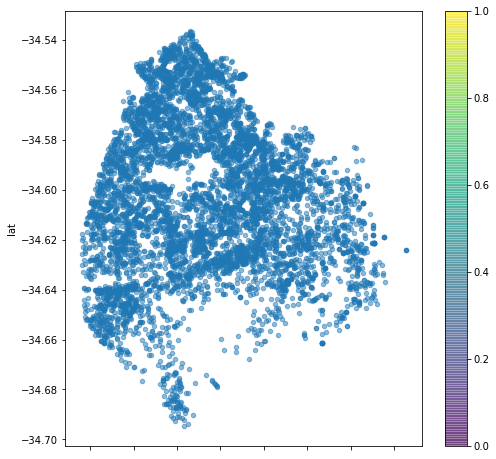

In [18]:
# Probanding plotear en mapa

obras.plot(kind='scatter', x='long', y='lat',
          cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(8,8))
plt.show()

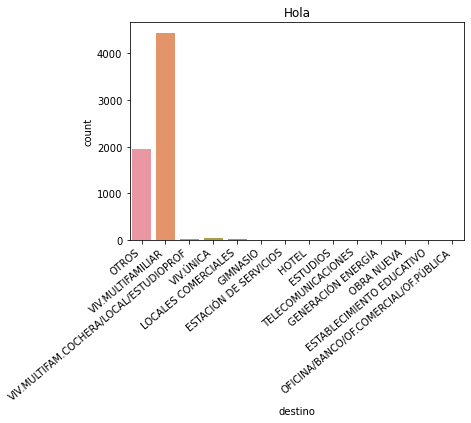

In [19]:
obras_cleaned.loc[obras_cleaned['metros_a_construir']==1, 'Banda']='Es un puntito'
obras_cleaned.loc[ (obras_cleaned['metros_a_construir']>1) & (obras_cleaned['metros_a_construir'] <=407), 'Banda']='407 m2'
obras_cleaned.loc[ (obras_cleaned['metros_a_construir']>407) & (obras_cleaned['metros_a_construir'] <=1086), 'Banda']='1806 m2'
obras_cleaned.loc[ (obras_cleaned['metros_a_construir']>1806) & (obras_cleaned['metros_a_construir'] <=2057), 'Banda']='2057 m2'
obras_cleaned.loc[ (obras_cleaned['metros_a_construir']>2057) & (obras_cleaned['metros_a_construir'] <=5000), 'Banda']='5000 m2'
obras_cleaned.loc[ (obras_cleaned['metros_a_construir']>5000),'Banda']='Media Argentina'

ax = sns.countplot(x='destino', data=obras_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Hola")
plt.show()



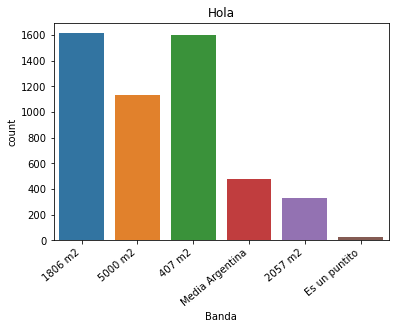

In [20]:
ax = sns.countplot(x='Banda', data=obras_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Hola")
plt.show()

In [21]:
barrios = len(obras_cleaned['barrio'].unique()) # Cantidad de valores unicos 

print(f'En total hay {barrios} tipos de obras."\r\n')
print("\n", obras['barrio'].unique())

# Ahre, horrible esto

En total hay 16 tipos de obras."


 ['Comuna 3' nan 'Comuna 13' 'Comuna 12' 'Comuna 2' 'Comuna 10' 'Comuna 14'
 'Comuna 7' 'Comuna 1' 'Comuna 5' 'Comuna 6' 'Comuna 11' 'Comuna 15'
 'Comuna 4' 'Comuna 9' 'Comuna 8']


In [22]:
comuna = len(obras_cleaned['codigo_postal'].unique()) # Cantidad de valores unicos 

print(f'En total hay {comuna} tipos de obras."\r\n')
print("\n", obras['codigo_postal'].unique())

# Bueeeeno, a acomodar again

En total hay 49 tipos de obras."


 ['Balvanera' nan 'Colegiales' 'Villa Urquiza' 'Recoleta' 'Villa Luro'
 'Palermo' 'Monte Castro' 'Flores' 'Saavedra' 'Floresta' 'Constitucion'
 'Almagro' 'San Cristobal' 'Caballito' 'Belgrano' 'Villa Devoto'
 'Villa Ortuzar' 'Parque Patricios' 'Villa Crespo' 'Villa Santa Rita'
 'Coghlan' 'Parque Chacabuco' 'Mataderos' 'Liniers' 'Boedo' 'Chacarita'
 'Villa Pueyrredon' 'Parque Chas' 'Villa Del Parque' 'Agronomia'
 'San Nicolas' 'Nu\\u00f1ez' 'Parque Avellaneda' 'Velez Sarsfield'
 'Retiro' 'Versalles' 'Boca' 'Barracas' 'Villa Gral. Mitre' 'Monserrat'
 'San Telmo' 'Villa Real' 'Villa Soldati' 'Paternal' 'Nueva Pompeya'
 'Villa Lugano' 'Villa Riachuelo' 'Puerto Madero']


In [23]:
# Vamos a borrar las obras sin comuna

obras_cleaned.dropna(subset=['codigo_postal'], how='any', inplace=True, axis='index')

filas = np.shape(obras_cleaned)[0] 
print(f'Filas resultantes del dataframe: {filas}')

Filas resultantes del dataframe: 6365


In [24]:
# Arreglamos nuñez

def clean_row(row):
    a=['Nu\\u00f1ez']
    
    if row.codigo_postal in a:
        return 'Nuñez'

    return row.codigo_postal
    
def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['codigo_postal']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)
print(obras_cleaned.codigo_postal.unique())
    

['Balvanera' 'Colegiales' 'Villa Urquiza' 'Recoleta' 'Villa Luro'
 'Palermo' 'Monte Castro' 'Flores' 'Saavedra' 'Floresta' 'Constitucion'
 'San Cristobal' 'Caballito' 'Belgrano' 'Villa Devoto' 'Almagro'
 'Villa Ortuzar' 'Parque Patricios' 'Villa Crespo' 'Villa Santa Rita'
 'Coghlan' 'Parque Chacabuco' 'Mataderos' 'Liniers' 'Boedo' 'Chacarita'
 'Villa Pueyrredon' 'Parque Chas' 'Villa Del Parque' 'Agronomia'
 'San Nicolas' 'Nuñez' 'Parque Avellaneda' 'Velez Sarsfield' 'Retiro'
 'Versalles' 'Boca' 'Barracas' 'Villa Gral. Mitre' 'Monserrat'
 'Villa Real' 'Villa Soldati' 'Paternal' 'Nueva Pompeya' 'Villa Lugano'
 'Villa Riachuelo' 'San Telmo' 'Puerto Madero']


In [25]:
estado= len(obras_cleaned['estado_tramite'].unique()) # Cantidad de valores unicos 

print(f'En total hay {estado} tipos de obras."\r\n')
print("\n", obras['estado_tramite'].unique())

# Parece joda, pero no se repiten 

En total hay 56 tipos de obras."


 ['Inicio de obra' 'Obra finalizada'
 'Pedido de excavación menor a 4 mts autorizado'
 'Pedido de demolición autorizado' 'En AVO 1' 'Excavación al >= -4m  50%'
 'En AVO 4' 'Pedido de excavación al 10% autorizado'
 'Pedido de AVO 2 autorizado' 'En AVO 3' 'Con pedido de demolición final'
 'En demolición' 'Excavación <= -4m' 'Pedido de AVO 3 autorizado'
 'Pedido de AVO 2 observado'
 'Pedido de excavación menor a 4 mts observado' 'En demolición final'
 'En AVO 2' 'Pedido de demolición final autorizado'
 'Pedido de AVO 1 autorizado' 'Alta de obra iniciada' 'Carga finalizada'
 'Pedido de excavación al 50% autorizado' 'Certificación aprobada'
 'Excavación al >= -4m  10%' 'Paralizada'
 'Pedido de inicio de obra observado' 'Pedido de AVO 3 observado'
 'Pedido de excavación al 10% observado'
 'Pedido de inicio de obra observado por completo'
 'Pedido de desvinculación observado' 'Pedido de AVO 1 observado'
 'Paralizada por desvinculación' 'Pedido de reinicio au

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


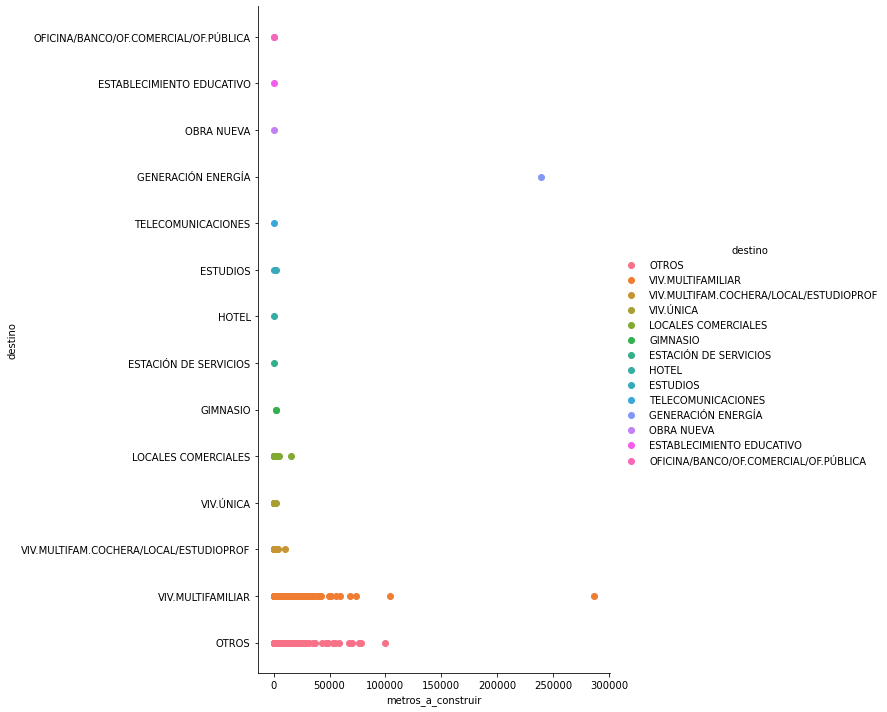

In [26]:
sns.FacetGrid(obras_cleaned, hue="destino", height=6, size=(10)) \
   .map(plt.scatter,'metros_a_construir','destino') \
   .add_legend()
plt.show()

## Objetivo del Proyecto:

##### Inferir la probabilidad de que el proyecto sea aprobado en función del destino, columna y m2 ????